<a href="https://colab.research.google.com/github/Esbern/GIS_demo/blob/main/simplegeodata_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eksample notbook to demonstrate the use of geodata

In [12]:
#First lode the python libaryes needed
import geopandas as gpd
import matplotlib.pyplot as plt


## Create a Python data frame of some Danish towns with ther location relative to Earth give as a point of latitute and longditute and print the data frame

In [13]:
from shapely.geometry import Point
# Define some Danish towns (longitude, latitude, name)
gdf_towns = gpd.GeoDataFrame([
    {"name": "Copenhagen", "coordinates": Point(12.5683, 55.6761)},
    {"name": "Aarhus", "coordinates": Point(10.2039, 56.1629)},
    {"name": "Odense", "coordinates": Point(10.4017, 55.4038)},
    {"name": "Aalborg", "coordinates": Point(9.9217, 57.0488)},
    {"name": "Esbjerg", "coordinates": Point(8.4500, 55.4765)},
])
# Display the GeoDataFrame
gdf_towns

,name,coordinates
0,Copenhagen,POINT (12.5683 55.6761)
1,Aarhus,POINT (10.2039 56.1629)
2,Odense,POINT (10.4017 55.4038)
3,Aalborg,POINT (9.9217 57.0488)
4,Esbjerg,POINT (8.45 55.4765)


### To process the data declare the coordinates coloum as geomatry and set the CRS ti WGS84. Then the data can be plottet




<Axes: >

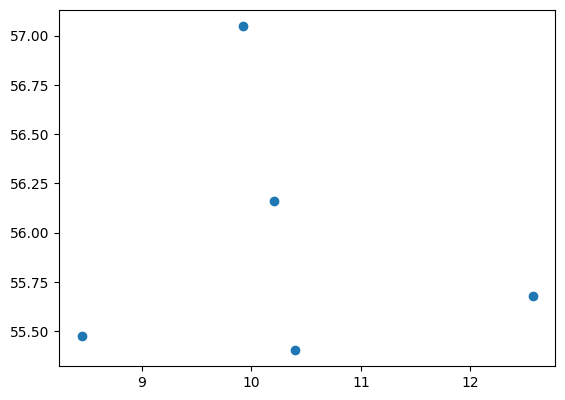

In [14]:
# Set 'coordinates' as the active geometry column
gdf_towns = gdf_towns.set_geometry('coordinates')  # Set geometry column before setting CRS

# Set a coordinate reference system (CRS)
gdf_towns.crs = 'epsg:4326'  # WGS84
gdf_towns.plot()

### Use the Folium libary can be use to generate the context using Open Street Map

In [15]:
import folium

# Create a base map centered around Denmark
m = folium.Map(location=[56.2639, 9.5018], zoom_start=7)

# Add the towns to the map with markers labeled with town names
for _, row in gdf_towns.iterrows():
    folium.Marker([row['coordinates'].y, row['coordinates'].x], popup=row['name']).add_to(m)

# Display the map
m

### Alternativly Load the outline of Denmark from a geojson files in order to supply som context

In [16]:
# Load the Denmark outline from the GeoJSON file
denmark_outline_url = "https://raw.githubusercontent.com/Esbern/gis_demo_data/main/dk1.geojson"
gdf_denmark = gpd.read_file(denmark_outline_url)

### Now we can plot the towns in the context

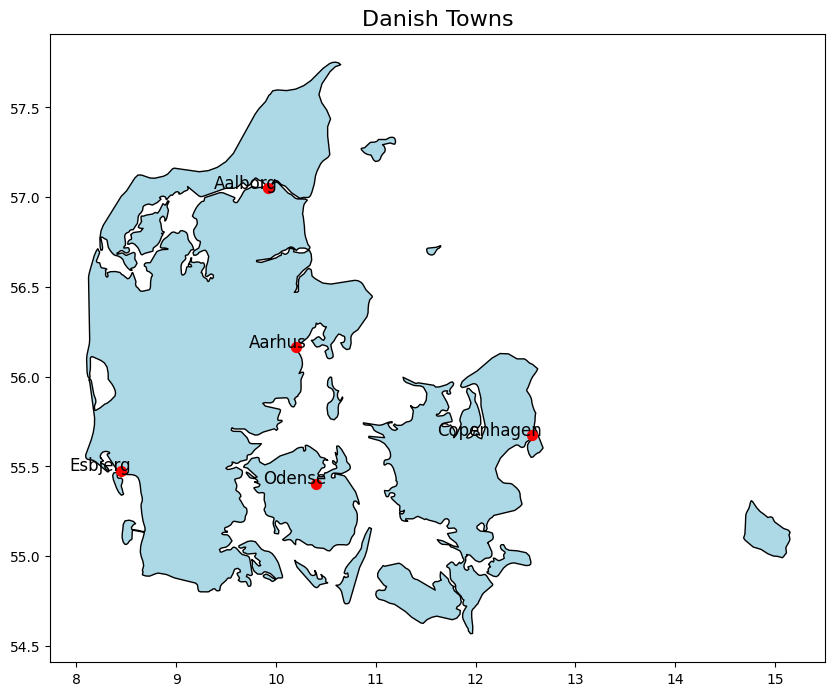

In [17]:
# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the outline of Denmark
gdf_denmark.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the towns on top
gdf_towns.plot(ax=ax, color='red', markersize=50)

# Annotate the town names
for x, y, label in zip(gdf_towns.geometry.x, gdf_towns.geometry.y, gdf_towns['name']):
    ax.text(x + 0.1, y, label, fontsize=12, ha='right')

# Set title and show the plot
ax.set_title("Danish Towns", fontsize=16)
plt.show()

## Linear features are represented Linear features are representet as a string of coordinates, here demonstratet with the bruige over the grate belt.

In [18]:
from shapely.geometry import  LineString
# Coordinates for the Storebælt Bridge (approximate)
bridge_coords = [
    (11.09324,55.34822),  # Start (on Zealand)
    (10.96626,55.32979),
    (10.82989,55.30102)   # End (on Funen)
]

# Create a LineString for the bridge
great_belt_bridge = LineString(bridge_coords)

# Create a GeoDataFrame for the bridge
gdf_bridge = gpd.GeoDataFrame(geometry=[great_belt_bridge])

# Set the coordinate reference system (CRS)
gdf_bridge.crs = 'epsg:4326'  # WGS84

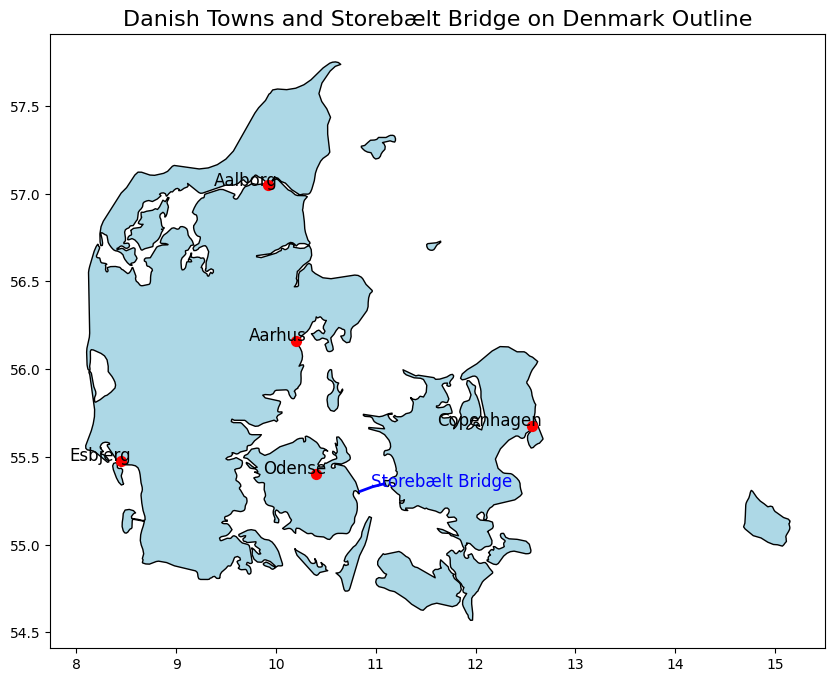

In [19]:
# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the outline of Denmark
gdf_denmark.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the towns on top
gdf_towns.plot(ax=ax, color='red', markersize=50)

# Plot the Great Belt Bridge
gdf_bridge.plot(ax=ax, color='blue', linewidth=2)

# Annotate the town names
for x, y, label in zip(gdf_towns.geometry.x, gdf_towns.geometry.y, gdf_towns['name']):
    ax.text(x + 0.1, y, label, fontsize=12, ha='right')

# Annotate the bridge
ax.text(10.95, 55.33, "Storebælt Bridge", fontsize=12, color='blue', ha='left')

# Set title and show the plot
ax.set_title("Danish Towns and Storebælt Bridge on Denmark Outline", fontsize=16)
plt.show()

### To demonstrate the use of polygons,To demonstrate the use of polygons we will look at a the Anholdt wind turbine area

In [20]:
from shapely.geometry import Polygon
# Define the wind turbine polygon coordinates
turbine_coords = [
  (11.32309, 56.57339), (11.18376, 56.50794), (11.18151, 56.59564),
  (11.14801, 56.67613), (11.15706, 56.70221), (11.18533, 56.70163),
  (11.24156, 56.6221), (11.32309, 56.57339)
]

# Create a Polygon for the wind turbines
turbine_polygon = Polygon(turbine_coords)

# Create a GeoDataFrame for the turbine polygon
gdf_turbine_polygon = gpd.GeoDataFrame(geometry=[turbine_polygon])
gdf_turbine_polygon.crs = 'epsg:4326'



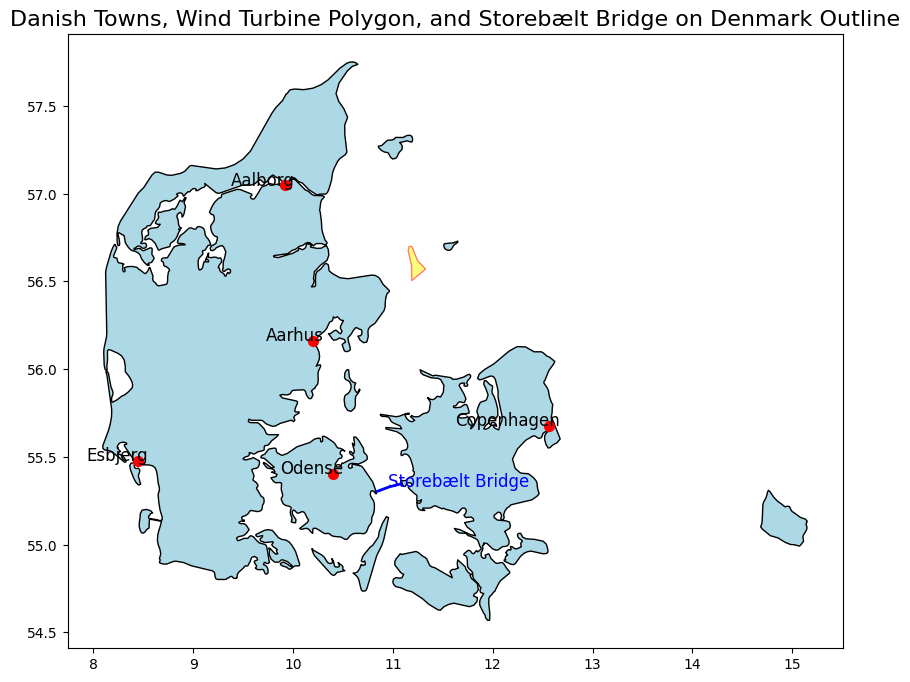

In [22]:
# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the outline of Denmark
gdf_denmark.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the turbine polygon
gdf_turbine_polygon.plot(ax=ax, color='yellow', alpha=0.5, edgecolor='red')

# Plot the towns
gdf_towns.plot(ax=ax, color='red', markersize=50)

# Plot the Great Belt Bridge
gdf_bridge.plot(ax=ax, color='blue', linewidth=2)

# Annotate the town names
for x, y, label in zip(gdf_towns.geometry.x, gdf_towns.geometry.y, gdf_towns['name']):
    ax.text(x + 0.1, y, label, fontsize=12, ha='right')

# Annotate the bridge
ax.text(10.95, 55.33, "Storebælt Bridge", fontsize=12, color='blue', ha='left')

# Set title and show the plot
ax.set_title("Danish Towns, Wind Turbine Polygon, and Storebælt Bridge on Denmark Outline", fontsize=16)
plt.show()